In [1]:
import pandas as pd
from pandas_datareader import data, wb
import seaborn as sns
import numpy as np
import datetime
%matplotlib inline 

In [2]:
#change it to inputs
instrument = 'EUR=X' 
start_date = datetime.datetime(2004,1,1)
imported_data = data.DataReader(instrument, 'yahoo',start=start_date)

In [3]:
imported_data.drop(['Volume','Adj Close'],axis=1,inplace=True)

In [4]:
imported_data['N_Open'] = ""
imported_data['N_High'] = ""
imported_data['N_Low'] = ""
imported_data['N_Close'] = ""
for quote in range(0,len(imported_data)):
    imported_data.iloc[quote,4] = 1/imported_data.iloc[quote,0]
    imported_data.iloc[quote,5] = 1/imported_data.iloc[quote,1]
    imported_data.iloc[quote,6] = 1/imported_data.iloc[quote,2]
    imported_data.iloc[quote,7] = 1/imported_data.iloc[quote,3]
imported_data.drop(['Open', 'High','Low','Close'],axis=1,inplace=True)
imported_data.rename(columns={'N_Open':'Open','N_High':'High','N_Low':'Low','N_Close':'Close'}, inplace=True)

In [5]:
imported_data['Count'] = ""
for price in range(0,len(imported_data)):
    if imported_data.iloc[price,3] > imported_data.iloc[price,0]:
        imported_data.iloc[price,4] = 1 
    elif imported_data.iloc[price,3] < imported_data.iloc[price,0]:
        imported_data.iloc[price,4] = -1

In [6]:
agg_plus = int(1)
agg_minus = int(-1)
imported_data['Sum'] = ""
for count in range(0,len(imported_data)-1):
    if (imported_data.iloc[count+1,4] == imported_data.iloc[count,4]) & (imported_data.iloc[count+1,4] == 1) :
        agg_plus += int(1)
        imported_data.iloc[count+1,5] = int(agg_plus)
    elif (imported_data.iloc[count+1,4] == imported_data.iloc[count,4]) & (imported_data.iloc[count+1,4] == -1) :
        agg_minus += int(-1)
        imported_data.iloc[count+1,5] = int(agg_minus)
    elif (imported_data.iloc[count+1,4] != imported_data.iloc[count,4]) & (imported_data.iloc[count+1,4] == 1) :
        imported_data.iloc[count+1,5] = int(1)
    elif (imported_data.iloc[count+1,4] != imported_data.iloc[count,4]) & (imported_data.iloc[count+1,4] == -1) :
        imported_data.iloc[count+1,5] = int(-1)
    else:
         imported_data.iloc[count+1,5] = 0
    
    if imported_data.iloc[count+1,4] != imported_data.iloc[count,4]:
        agg_plus = int(1)
        agg_minus = int(-1)
        
imported_data.iloc[0,5] = imported_data.iloc[0,4]    

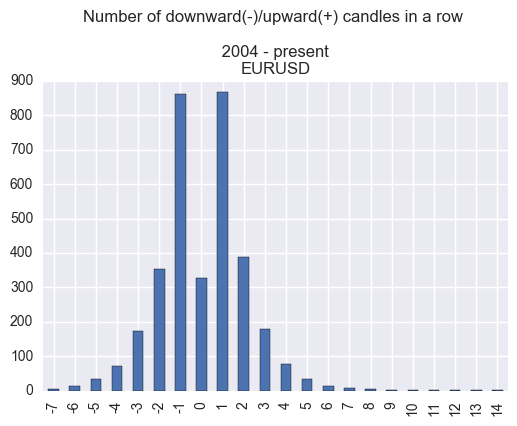

In [21]:
bar = pd.DataFrame(imported_data['Sum'].value_counts())
bar = bar.sort_index()
bar.plot(kind='bar', title='Number of downward(-)/upward(+) candles in a row \n\n 2004 - present \nEURUSD', legend='')
